# 김현수 스포츠 뉴스 스크래핑

주제: 2016년 1월~현재까지 월별로 김현수의 기사 제목의 명사를 추출하여 김현수의 상황을 대변하는 특정단어를 파악하고자 함.

진행상황:  김현수의 제목을 끌어오고 빈도를 확인하는 수준에서 완료됨..




In [1]:
import requests

In [2]:
import lxml.html

In [3]:
import csv

In [49]:
url = 'http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=exist%3A107&query=%B1%E8%C7%F6%BC%F6&x=13&y=9&sm=title.basic&pd=4&startDate=2016-01-01&endDate=2016-06-16&page={}'

In [6]:
with open('mlb.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 100):
        res = requests.get(url.format(i))  
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue
                
                


# 스크래핑된 스포츠뉴스 읽어오기

In [50]:
import csv

In [51]:
news = []
with open('mlb.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [52]:
from konlpy.tag import Twitter

In [53]:
tagger = Twitter()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [56]:
tdf = cv.fit_transform(news)

In [57]:
tdf

<14x50 sparse matrix of type '<class 'numpy.int64'>'
	with 538 stored elements in Compressed Sparse Row format>

In [58]:
words = cv.get_feature_names()

In [59]:
words

['감',
 '경기',
 '구',
 '기록',
 '기자',
 '김현수',
 '날',
 '두',
 '득점',
 '로',
 '루',
 '루타',
 '마일',
 '멀티히트',
 '무사',
 '미국',
 '박병호',
 '번',
 '보스턴',
 '볼넷',
 '볼티모어',
 '부산',
 '사',
 '상대',
 '선두',
 '선발',
 '시즌',
 '안타',
 '에서',
 '이대호',
 '이후',
 '일',
 '일보',
 '좌익수',
 '중견수',
 '첫',
 '출전',
 '타격',
 '타구',
 '타석',
 '타수',
 '타율',
 '타자',
 '투수',
 '팀',
 '패스트볼',
 '회',
 '회말',
 '회초',
 '후속']

# 한 글자 짜리, 특정 단어 빼기

In [74]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if ((len(noun) > 1) & (noun != "김현수")) & (noun != "이대호")& (noun != "강정호")]

In [75]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [76]:
tdf = cv.fit_transform(news)

In [77]:
words = cv.get_feature_names()

In [78]:
words

['경기',
 '기록',
 '기자',
 '기회',
 '득점',
 '뜬공',
 '루타',
 '마일',
 '멀티히트',
 '메릴랜드주',
 '무사',
 '미국',
 '미네소타',
 '박병호',
 '배포',
 '보스턴',
 '볼넷',
 '볼티모어',
 '부산',
 '삼진',
 '상대',
 '선두',
 '선발',
 '시간',
 '시즌',
 '안타',
 '에서',
 '연속',
 '이후',
 '일보',
 '전날',
 '좌익수',
 '중견수',
 '지난달',
 '출루',
 '출전',
 '카운트',
 '캠든',
 '타격',
 '타구',
 '타석',
 '타수',
 '타율',
 '타자',
 '투수',
 '패스트볼',
 '한국',
 '회말',
 '회초',
 '후속']

# 단어별 출현 빈도

In [79]:
import numpy

In [80]:
count_mat = tdf.sum(axis=0)

In [81]:
count_mat

matrix([[65, 45, 14, 13, 39, 12, 18, 25, 22, 11, 15, 21, 11, 18, 11, 21, 29,
         38, 22, 12, 16, 16, 31, 11, 32, 81, 17, 14, 15, 22, 13, 20, 15, 12,
         12, 19, 11, 14, 20, 29, 51, 22, 16, 54, 18, 16, 14, 49, 31, 25]], dtype=int64)

In [82]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [83]:
count

array([65, 45, 14, 13, 39, 12, 18, 25, 22, 11, 15, 21, 11, 18, 11, 21, 29,
       38, 22, 12, 16, 16, 31, 11, 32, 81, 17, 14, 15, 22, 13, 20, 15, 12,
       12, 19, 11, 14, 20, 29, 51, 22, 16, 54, 18, 16, 14, 49, 31, 25], dtype=int64)

In [84]:
word_count = list(zip(words, count))

In [85]:
word_count

[('경기', 65),
 ('기록', 45),
 ('기자', 14),
 ('기회', 13),
 ('득점', 39),
 ('뜬공', 12),
 ('루타', 18),
 ('마일', 25),
 ('멀티히트', 22),
 ('메릴랜드주', 11),
 ('무사', 15),
 ('미국', 21),
 ('미네소타', 11),
 ('박병호', 18),
 ('배포', 11),
 ('보스턴', 21),
 ('볼넷', 29),
 ('볼티모어', 38),
 ('부산', 22),
 ('삼진', 12),
 ('상대', 16),
 ('선두', 16),
 ('선발', 31),
 ('시간', 11),
 ('시즌', 32),
 ('안타', 81),
 ('에서', 17),
 ('연속', 14),
 ('이후', 15),
 ('일보', 22),
 ('전날', 13),
 ('좌익수', 20),
 ('중견수', 15),
 ('지난달', 12),
 ('출루', 12),
 ('출전', 19),
 ('카운트', 11),
 ('캠든', 14),
 ('타격', 20),
 ('타구', 29),
 ('타석', 51),
 ('타수', 22),
 ('타율', 16),
 ('타자', 54),
 ('투수', 18),
 ('패스트볼', 16),
 ('한국', 14),
 ('회말', 49),
 ('회초', 31),
 ('후속', 25)]

# 빈도 순 정렬

In [86]:
import operator

In [87]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('안타', 81),
 ('경기', 65),
 ('타자', 54),
 ('타석', 51),
 ('회말', 49),
 ('기록', 45),
 ('득점', 39),
 ('볼티모어', 38),
 ('시즌', 32),
 ('선발', 31),
 ('회초', 31),
 ('볼넷', 29),
 ('타구', 29),
 ('마일', 25),
 ('후속', 25),
 ('멀티히트', 22),
 ('부산', 22),
 ('일보', 22),
 ('타수', 22),
 ('미국', 21),
 ('보스턴', 21),
 ('좌익수', 20),
 ('타격', 20),
 ('출전', 19),
 ('루타', 18),
 ('박병호', 18),
 ('투수', 18),
 ('에서', 17),
 ('상대', 16),
 ('선두', 16),
 ('타율', 16),
 ('패스트볼', 16),
 ('무사', 15),
 ('이후', 15),
 ('중견수', 15),
 ('기자', 14),
 ('연속', 14),
 ('캠든', 14),
 ('한국', 14),
 ('기회', 13),
 ('전날', 13),
 ('뜬공', 12),
 ('삼진', 12),
 ('지난달', 12),
 ('출루', 12),
 ('메릴랜드주', 11),
 ('미네소타', 11),
 ('배포', 11),
 ('시간', 11),
 ('카운트', 11)]

# 워드 클라우드

In [34]:
%matplotlib inline

In [88]:
from wordcloud import WordCloud

In [89]:
from matplotlib import pyplot

In [90]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

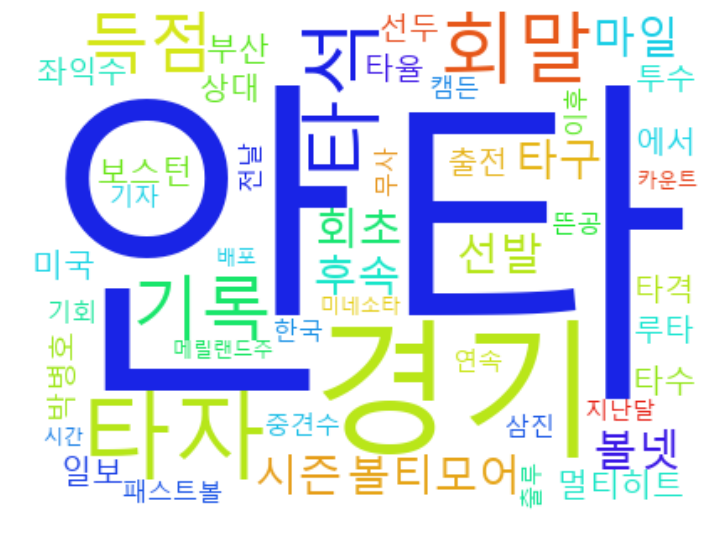

In [91]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()